In [2]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
# Load data
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

In [4]:
# First 10 rows of the data
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [5]:
#descriptive statistics
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

- The value is `6.757692`. This value will be compared to the mean value after sampling with replacement later in the notebook.

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

- The count value for the `aqi` column is 260. This means there are 260 AQI measurements represented in this dataset.

In [6]:
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

# Statistical test

In [7]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

In [8]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

- Sampling with replacement is random, allowing sampling units to occur more than once. Row index 102 just happened to be sampled more than once. 

**Question:** What does `random_state` do?

- The parameter allows for the reproduction of the same exact sample (i.e., the same set of numbers). This means that the same rows in the dataset will be sampled with replacement each time the command is run. 

In [9]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

 **Question:** Why is `sample_mean` different from `population_mean`?

- Due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.  

# Central limit theorem

In [11]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

In [12]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,5.96
1,5.58
2,6.18
3,6.64
4,7.00
...,...
9995,6.66
9996,7.40
9997,7.60
9998,6.72


In [13]:
#compute mean of the sample distribution
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.741359999999999

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

This number will vary as `random_state` was not set to a value. 

**Question:** How are the central limit theorem and random sampling (with replacement) related?

Random sampling with replacement is related to the central limit theorem because it means you are drawing observations independently from a population. The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error. 

<Axes: >

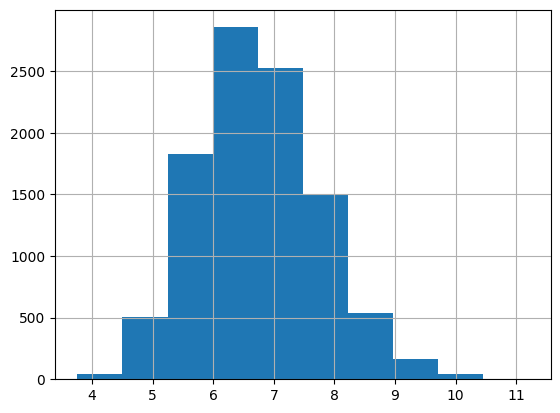

In [14]:
estimate_df['estimate'].hist()

In [15]:
#calculate standard error
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290325

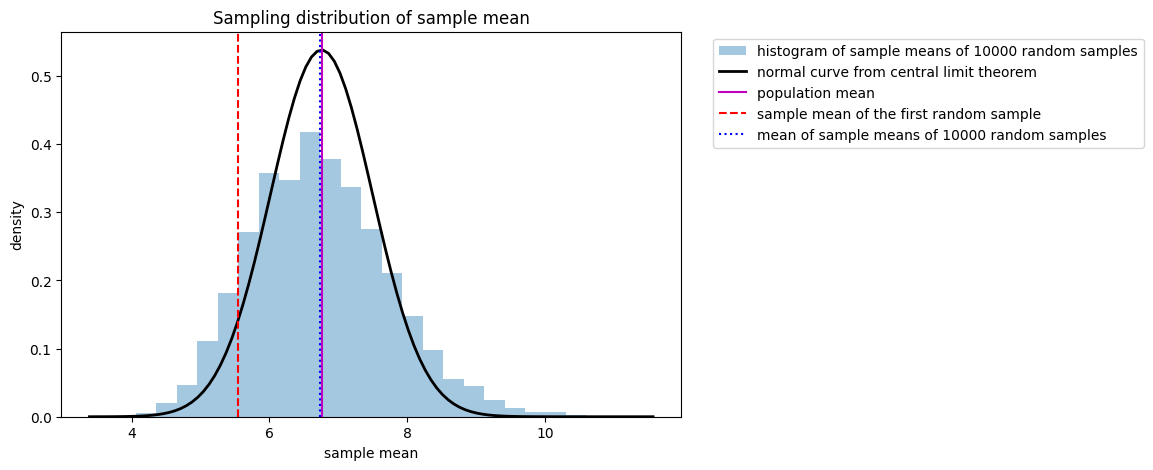

In [16]:
 # Generate a grid of 100 values from xmin to xmax.

plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

**Question:** What insights did you gain from the preceding sampling distribution?

1.  The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
2.  The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if `epa_data.sample(n=50, replace=True, random_state=42)` had a different value for `random_state`.
3.  The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

# Considerations

**What are some key takeaways that you learned from this lab?**
- Sampling with replacement on a dataset leads to duplicate rows.
- Sample means are different from population means due to sampling variability.
- The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.


**What findings would you share with others?**
- The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
- This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.

**What would you convey to external stakeholders?**
- Carbon monoxide levels are satisfactory in general.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.